In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,silhouette_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [20]:
data=load_breast_cancer()
X=data.data
y=data.target
feature_names = data.feature_names

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)

In [23]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('kmeans',KMeans(n_clusters=2,random_state=42))
])

In [24]:
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

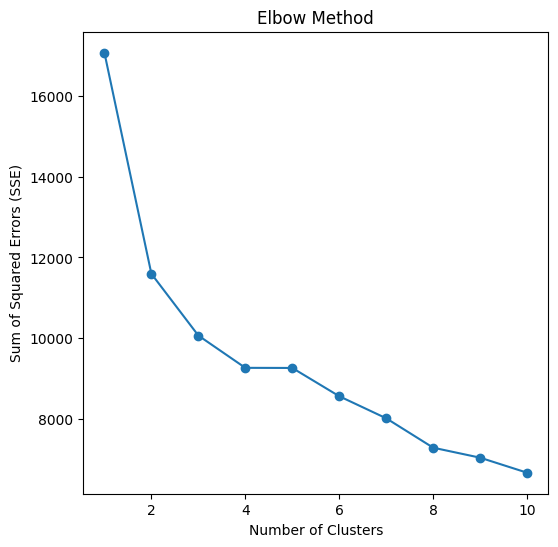

In [26]:
sse=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    pipeline=Pipeline([
        ('scaler',StandardScaler()),
        ('kmeans',kmeans)
    ])
    pipeline.fit(X)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(6,6))
plt.plot(range(1,11),sse,marker='o')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

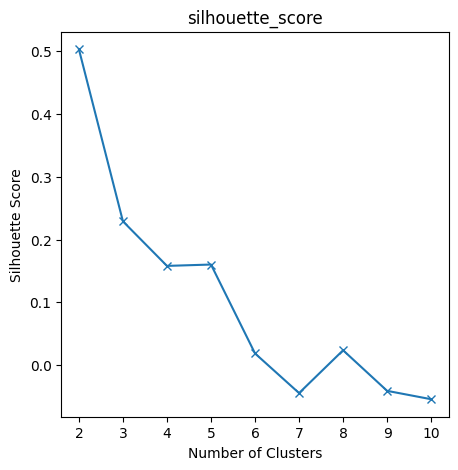

In [27]:
silhouette_scores=[]
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', kmeans)
    ])
    pipeline.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_scores.append(score)
    
plt.figure(figsize=(5,5))
plt.plot(range(2,11),silhouette_scores,marker='x')
plt.title("silhouette_score")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [28]:
features,true_labels=make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [29]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [30]:
true_labels[:5]

array([1, 0, 2, 2, 2])

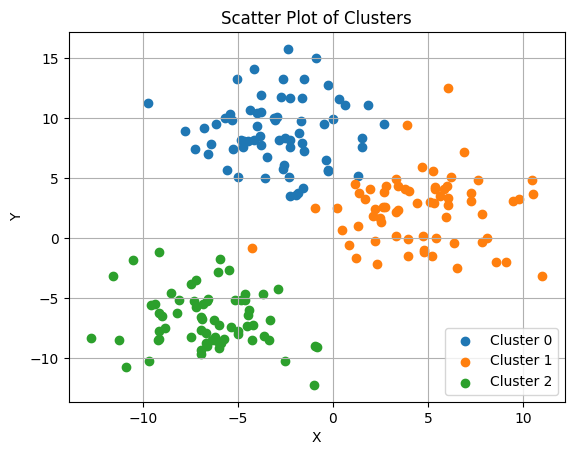

In [31]:
for label in set(true_labels):
    plt.scatter(features[true_labels == label][:, 0],
                features[true_labels == label][:, 1],
                label=f'Cluster {label}')
plt.title('Scatter Plot of Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
kmeans=KMeans(init='random',n_clusters=3,n_init=10,random_state=42)
kmeans.fit(scaled_features)
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]


In [34]:
kmeans1=KMeans(init='k-means++',n_clusters=3,n_init=10,random_state=42)
kmeans1.fit(scaled_features)
print(kmeans1.inertia_)
print(kmeans1.cluster_centers_)

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.91941183 -1.18551732]
 [-0.25813925  1.05589975]]


In [35]:
L = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    L.append(kmeans.inertia_)

In [36]:
L

[400.00000000000006,
 173.23074893877765,
 74.57960106819854,
 61.37227628809653,
 52.275387259021116,
 45.18296492976121,
 40.4655696972595,
 34.79423830005605,
 30.74195582754622,
 28.200015604968428]

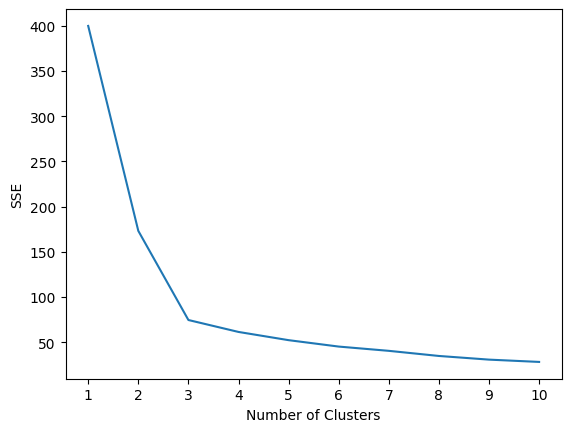

In [37]:
plt.plot(range(1, 11), L)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

In [40]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

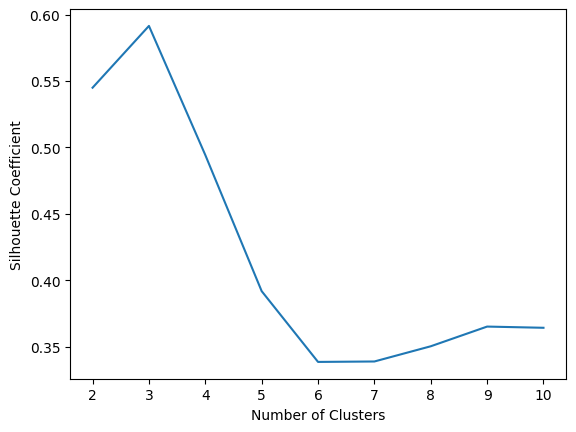

In [41]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.read_csv("housing.csv")
# df.head(3)

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=6,n_init=10,max_iter=300,random_state=42,init="random")

# df['Cluster'] = kmeans.fit_predict(df)
# df["Cluster"] = df["Cluster"].astype("category")
# df.head()

# sns.relplot(
#     x="longitude", y="latitude", hue="Cluster", data=df, height=6,
# );

# kmeans.inertia_
# kmeans.cluster_centers_

# sum_se = []
# list_k = list(range(1,10))
# for k in list_k:
#     km = KMeans(n_clusters=k)
#     km.fit(df)
#     sum_se.append(km.inertia_)
# plt.figure(figsize=(6,6))
# plt.plot(list_k,sum_se,'-o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Sum of Squared error')
# plt.title(label="Elbow Method")
# plt.show()

# from sklearn.metrics import silhouette_score
# kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 100,"random_state": 42}
# from sklearn.metrics import silhouette_score
# silhoutte_coef = []
# for k in range(2,11):
#     km = KMeans(n_clusters=k,**kmeans_kwargs)
#     km.fit(df)
#     score = silhouette_score(df,kmeans.labels_)
#     silhoutte_coef.append(score)

# plt.figure(figsize=(6,6))
# plt.plot(range(2,11),silhoutte_coef,'-o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhoutte Coeff')
# plt.title(label="Silhoutte Method")
# plt.show()
# print(silhoutte_coef)

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# df.values

# preprocessor = Pipeline([
#     ("scaler",StandardScaler()),
#     ("pca",PCA(n_components=2,random_state=42))
# ])
# kmeans = KMeans(n_clusters=6, n_init=10, max_iter=300, random_state=42)


# # Create pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('kmeans', kmeans)
# ])

# # Fit the pipeline to your data
# pipeline.fit(df)